In [2]:
import pandas as pd
import torch
import re
from bert_score import score

# Load the DataFrame from the Excel file
input_file = "abstract_summary_t5_small.xlsx"
df = pd.read_excel(input_file)

# Define lists to store the BERT metric scores
bert_metric_scores = []

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    # Get the original text and the generated summary
    abstract = row['Abstract']

    # Clean the abstract and claims text
    abstract = re.sub(r'[^\x00-\x7F]+', '', str(abstract))

    # Combine the cleaned abstract and claims
    original_text = abstract
    generated_summary = str(row['Abstract_Summary'])

    # Calculate BERT metric scores
    _, _, bert_metric_score = score([generated_summary], [original_text], model_type="bert-base-uncased", device=device)

    # Append the score to the BERT metric scores list
    bert_metric_scores.append(bert_metric_score.item())

# Add the scores to the DataFrame
df["BERT_Metric_Score"] = bert_metric_scores

# Save the updated DataFrame to a new Excel file
output_file = "Summary_Scores_BERT_metric_t5_small_total.xlsx"
df.to_excel(output_file, index=False)

# Print the average BERT metric score
print("Average BERT Metric Score:", sum(bert_metric_scores) / len(bert_metric_scores))


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.

Average BERT Metric Score: 0.8117158670549743


In [1]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import torch
import re
from bert_score import score

# Load the DataFrame from the Excel file
input_file = "claim_summary_t5_small.xlsx"
df = pd.read_excel(input_file)

# Define lists to store the BERT metric scores
bert_metric_scores = []

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    # Get the original text and the generated summary
    claims = row['Claims']

    # Clean the abstract and claims text
    claims = re.sub(r'[^\x00-\x7F]+', '', str(claims))

    # Combine the cleaned abstract and claims
    original_text = claims
    generated_summary = str(row['claim_Summary'])

    # Calculate BERT metric scores
    _, _, bert_metric_score = score([generated_summary], [original_text], model_type="bert-base-uncased", device=device)

    # Append the score to the BERT metric scores list
    bert_metric_scores.append(bert_metric_score.item())

# Add the scores to the DataFrame
df["BERT_Metric_Score"] = bert_metric_scores

# Save the updated DataFrame to a new Excel file
output_file = "Summary_Scores_BERT_metric_t5_small_total_claims.xlsx"
df.to_excel(output_file, index=False)

# Print the average BERT metric score
print("Average BERT Metric Score:", sum(bert_metric_scores) / len(bert_metric_scores))


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predict

Average BERT Metric Score: 0.6664756617663097


In [ ]:
import pandas as pd
import torch
import re
from bert_score import score

# Load the DataFrame from the Excel file
input_file = "Combined_Google_patent_Summary_t5_small.xlsx"
df = pd.read_excel(input_file)

# Define lists to store the BERT metric scores
bert_metric_scores = []

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    # Get the original text and the generated summary
    abstract = row['Abstract_Summary']
    claims = row['claim_Summary']

    # Clean the abstract and claims text
    abstract = re.sub(r'[^\x00-\x7F]+', '', str(abstract))
    claims = re.sub(r'[^\x00-\x7F]+', '', str(claims))

    # Combine the cleaned abstract and claims
    original_text = abstract+' '+claims
    generated_summary = str(row['Combined_Summary'])

    # Calculate BERT metric scores
    _, _, bert_metric_score = score([generated_summary], [original_text], model_type="bert-base-uncased", device=device)

    # Append the score to the BERT metric scores list
    bert_metric_scores.append(bert_metric_score.item())

# Add the scores to the DataFrame
df["BERT_Metric_Score"] = bert_metric_scores

# Save the updated DataFrame to a new Excel file
output_file = "Summary_Scores_BERT_metric_t5_small_total_combined.xlsx"
df.to_excel(output_file, index=False)

# Print the average BERT metric score
print("Average BERT Metric Score:", sum(bert_metric_scores) / len(bert_metric_scores))


Output: executed in server

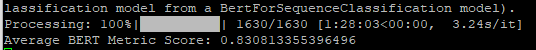